<a href="https://www.kaggle.com/code/adritpal08/movie-recommender-system?scriptVersionId=107777096" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import ast
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px


# Import Dataset

In [2]:
movies=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
# movies.head(1)
credits = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
# credits.head(1)

# Merge two dataset

In [3]:
movies=movies.merge(credits,on='title')

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
print (movies.shape)
movies.info()

(4809, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status    

In [6]:
movies.isna().sum().to_frame()
# movies.isnull().sum()

,0
budget,0
genres,0
homepage,3096
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


# Details Analysis

In [7]:
def overview_dataset(df):
    # Observetions
    print("Number of observetion:", df.shape[0])
    # Features
    print("Number of features:", df.shape[1])
    print("-"*60)
    #Categorical Features
    print("Categorical Features:", df.select_dtypes(include = [object]).columns)
    print("")
    # Numerical Features
    print("Numerical Features:", df.select_dtypes(include = [int,float]).columns)
    
overview_dataset(movies)

Number of observetion: 4809
Number of features: 23
------------------------------------------------------------
Categorical Features: Index(['genres', 'homepage', 'keywords', 'original_language', 'original_title',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'status', 'tagline', 'title',
       'cast', 'crew'],
      dtype='object')

Numerical Features: Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'movie_id'],
      dtype='object')


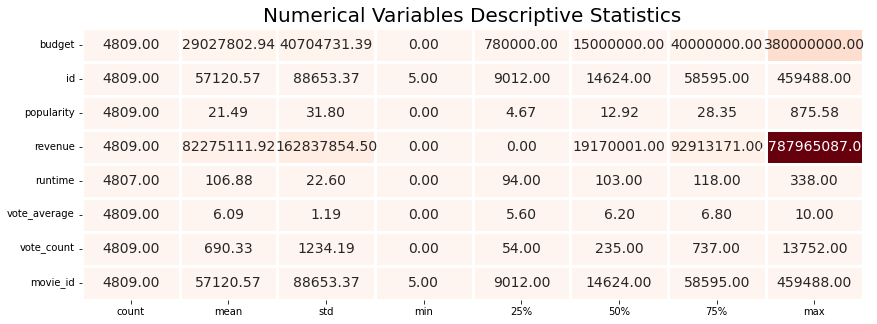

In [8]:
def describe_plot(df):
    numerical_col = df.select_dtypes(include = [int,float]).columns
    describe_numcol_values = df[numerical_col].describe().T
    
    plt.figure(figsize = (14,5))
    sns.heatmap(describe_numcol_values,
                annot = True,
                cmap = "Reds",
                fmt= '.2f',
                linecolor = 'white',
                linewidths = 1.35,
                cbar = False,
                annot_kws = {"size": 14})
    plt.title("Numerical Variables Descriptive Statistics" , fontsize = 20)
    plt.show()
describe_plot(movies)

# Categorical Variables - Describe

In [9]:
movies[movies.select_dtypes(include=[object]).columns].describe().T

,count,unique,top,freq
genres,4809,1175,"[{""id"": 18, ""name"": ""Drama""}]",372
homepage,1713,1691,http://www.missionimpossible.com/,4
keywords,4809,4222,[],412
original_language,4809,37,en,4510
original_title,4809,4801,Out of the Blue,4
overview,4806,4800,Gang-du is a dim-witted man working at his fat...,2
production_companies,4809,3697,[],352
production_countries,4809,469,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2979
release_date,4808,3280,2006-01-01,10
spoken_languages,4809,544,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",3175


# Drop unimportant columns

In [10]:
movies = movies.drop(columns = ['homepage', 'tagline','status','production_countries' , 'release_date'] )

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   id                    4809 non-null   int64  
 3   keywords              4809 non-null   object 
 4   original_language     4809 non-null   object 
 5   original_title        4809 non-null   object 
 6   overview              4806 non-null   object 
 7   popularity            4809 non-null   float64
 8   production_companies  4809 non-null   object 
 9   revenue               4809 non-null   int64  
 10  runtime               4807 non-null   float64
 11  spoken_languages      4809 non-null   object 
 12  title                 4809 non-null   object 
 13  vote_average          4809 non-null   float64
 14  vote_count            4809 non-null   int64  
 15  movie_id             

# Weighted Average

**Weighted average is a calculation that takes into account the varying degrees of importance of the numbers in a data set. In calculating a weighted average, each number in the data set is multiplied by a predetermined weight before the final calculation is made.**

**A weighted average can be more accurate than a simple average in which all numbers in a data set are assigned an identical weight**

v = The number of voters
R = Average vote for the movie
C = The average of the whole average column =~6.9
m = minimum votes required to be listed

In [12]:
v = movies['vote_count']
R = movies['vote_average']
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.70)

In [13]:
movies['Weighted_avg'] = ((R*v)+(C*m)) / (v+m)

In [14]:
movies

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,Weighted_avg
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148029
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807666
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276115
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509585
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",6.239989
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],0,85.0,[],Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",6.090871
4806,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6,231617,"[{""c

# Weight Avg wise storting

In [15]:
movies_sorted = movies.sort_values('Weighted_avg',ascending = False )
movies_sorted[['original_title','vote_count', 'vote_average' , 'Weighted_avg' ,'popularity']]

,original_title,vote_count,vote_average,Weighted_avg,popularity
1887,The Shawshank Redemption,8205,8.5,8.340798,136.747729
3342,The Godfather,5893,8.4,8.192918,143.659698
662,Fight Club,9413,8.3,8.171668,146.757391
3237,Pulp Fiction,8428,8.3,8.157637,121.463076
65,The Dark Knight,12002,8.2,8.102690,187.322927
...,...,...,...,...,...
303,Catwoman,808,4.2,4.991613,32.271938
3753,The Boy Next Door,1022,4.1,4.822178,24.161735
210,Batman & Robin,1418,4.2,4.750050,50.073575
242,Fantastic Four,2278,4.4,4.743949,38.126095


# Top movies by rating

In [16]:
# weight_avg = movies.sort_values('Weighted_avg',ascending = False)
# plt.figure(figsize = (12,8))
# sns.barplot(x = weight_avg['Weighted_avg'].head(10) , y = weight_avg['original_title'].head(10))
# plt.xlabel('Weighted Avg Rating')
# plt.ylabel('Movie name')
# plt.title('Movies by Weighted Avg Score')

In [17]:
weight_avg = movies.sort_values('Weighted_avg',ascending = False)
fig = px.bar(weight_avg, x=weight_avg['Weighted_avg'].head(10), y=weight_avg['original_title'].head(10),color=weight_avg['original_title'].head(10),orientation='h',title='Movies by Weighted Avg Rating')
fig.update_xaxes(title='Weighted Avg Rating', visible=True, showticklabels=True)
fig.update_yaxes(title='Movies Name', visible=True, showticklabels=True)
fig.update_traces(hovertemplate='Movies:%{y}<br>Weighted Avg:%{x}')

# hiding legend in pyplot express.
fig.update(layout_showlegend=False)
fig.show()

# Top movies by popularity

In [18]:
# popular = movies.sort_values('popularity',ascending = False)
# plt.figure(figsize = (12,8))
# sns.barplot(x = popular['popularity'].head(10) , y = popular['original_title'].head(10))
# plt.xlabel('popularity')
# plt.ylabel('Movie name')
# plt.title('Movies by Popularity')

In [19]:
popular = movies.sort_values('popularity',ascending = False)
fig = px.bar(popular, x=popular['popularity'].head(10), y=popular['original_title'].head(10),color=popular['original_title'].head(10),orientation='h',title='Movies by Popularity')
fig.update_xaxes(title='Popularity', visible=True, showticklabels=True)
fig.update_yaxes(title='Movies Name', visible=True, showticklabels=True)
fig.update_traces(hovertemplate='Movies:%{y}<br>Popularity:%{x}')

# hiding legend in pyplot express.
fig.update(layout_showlegend=False)
fig.show()

# # Score calculatin

**So we can't recommend movies based on rating(Weight Avg.) or popularity.
we need to create a score base on these two features.**

# Scaling
There are big difference between weight Avg and popularity

In [20]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
normalized_df = scale.fit_transform(movies[['Weighted_avg' , 'popularity']])
scaled_df = pd.DataFrame(normalized_df , columns = ['Weighted_avg' , 'popularity'])

In [21]:
scaled_df

,Weighted_avg,popularity
0,0.674322,0.171815
1,0.581388,0.158846
2,0.436251,0.122635
3,0.773043,0.128272
4,0.387725,0.050169
...,...,...
4804,0.426387,0.016298
4805,0.385672,0.000734
4806,0.388653,0.001650
4807,0.384844,0.000979


In [22]:
movies[['scaled_weighted_avg' , 'scaled_popularity']] = scaled_df
movies.head(5)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,revenue,...,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,Weighted_avg,scaled_weighted_avg,scaled_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2787965087,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148029,0.674322,0.171815
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",961000000,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807666,0.581388,0.158846
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",880674609,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276115,0.436251,0.122635
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",1084939099,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509585,0.773043,0.128272
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",284139100,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098392,0.387725,0.050169


**Now create score and give 50% importance to newly created these two column - scaled_weighted_avg and scaled_popularity**

In [23]:
movies['score'] = movies['scaled_weighted_avg'] * 0.5 + movies['scaled_popularity'] * 0.5
movies_scored = movies.sort_values('score' , ascending = False)
movies_scored[['original_title' , 'scaled_weighted_avg' , 'scaled_popularity' , 'score']].head(10)

,original_title,scaled_weighted_avg,scaled_popularity,score
95,Interstellar,0.906433,0.827162,0.866798
546,Minions,0.460609,1.000000,0.730305
94,Guardians of the Galaxy,0.851866,0.549462,0.700664
788,Deadpool,0.725203,0.587690,0.656446
127,Mad Max: Fury Road,0.670957,0.495989,0.583473
1887,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934986,0.213941,0.574464
3872,Whiplash,0.916432,0.219887,0.568159
3342,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953820,0.167611,0.560716


# Top movies by score

In [24]:
# score_df = movies.sort_values('score',ascending = False)
# plt.figure(figsize = (12,8))
# sns.barplot(x = score_df['score'].head(10) , y = score_df['original_title'].head(10) )
# plt.xlabel('score')
# plt.ylabel('Movie name')
# plt.title('Top 10 Recomended movies by score')

In [25]:
score_df = movies.sort_values('score',ascending = False)
fig = px.bar(score_df, x=score_df['score'].head(10), y=score_df['original_title'].head(10),color=score_df['original_title'].head(10),orientation='h',title='Top 10 Recomended movies by score')
fig.update_xaxes(title='Score', visible=True, showticklabels=True)
fig.update_yaxes(title='Movies Name', visible=True, showticklabels=True)
fig.update_traces(hovertemplate='Movies:%{y}<br>Score:%{x}')

# hiding legend in pyplot express.
fig.update(layout_showlegend=False)
fig.show()

# # Now create recommendation model

# Features selection

In [26]:
movies=movies[["movie_id","original_title","overview","genres","cast","crew","keywords"]]

In [27]:
movies.head(1)

,movie_id,original_title,overview,genres,cast,crew,keywords
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."


In [28]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie_id        4809 non-null   int64 
 1   original_title  4809 non-null   object
 2   overview        4806 non-null   object
 3   genres          4809 non-null   object
 4   cast            4809 non-null   object
 5   crew            4809 non-null   object
 6   keywords        4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


In [29]:
print("#Count of null values")
print(movies.isnull().sum().to_frame())
print("#Count of duplicate data")
print(movies.duplicated().sum())
movies.dropna(inplace=True)

#Count of null values
                0
movie_id        0
original_title  0
overview        3
genres          0
cast            0
crew            0
keywords        0
#Count of duplicate data
0


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
print(movies.isnull().sum().to_frame())

                0
movie_id        0
original_title  0
overview        0
genres          0
cast            0
crew            0
keywords        0


In [31]:
# print(type(movies.iloc[0].genres))
print(movies.iloc[0].genres)
# print(movies.iloc[0].cast)
print(movies.iloc[0].keywords)

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]


In [32]:
a=ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')
print(type(a))
a[1]['name']

<class 'list'>


'Adventure'

**Now geners, cast, crew, keywords columns are not properly arrange.  
Now i arrange those column properly.  
Create a function to collect name from genres,cast, keywords**

In [33]:
## create a funtion for collect name
def convert(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

**Create a function to collect director name from crew column**

In [34]:
##create a function for collect director name
def director(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            l.append(i['name'])
    return l

**Apply all the function**

In [35]:
##Apply all the function 
movies['genres']=movies['genres'].apply(convert)
movies['keywords']=movies['keywords'].apply(convert)
movies['cast']=movies['cast'].apply(convert)
movies['crew']=movies['crew'].apply(director)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

# Genres wise count movies

The explode() method converts each element of the specified column(s) into a row

In [36]:
movies_genres=movies.explode("genres")
movies_genres

,movie_id,original_title,overview,genres,cast,crew,keywords
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon..."
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Adventure,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon..."
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Fantasy,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon..."
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Science Fiction,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[ocean, drug abuse, exotic island, east india ..."
...,...,...,...,...,...,...,...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",Drama,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",[Scott Smith],"[date, love at first sight, narration, investi..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",Romance,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",[Scott Smith],"[date, love at first sight, narration, investi..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",TV Movie,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",[Scott Smith],"[date, love at first sight, narration, investi..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,NaN,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",[Daniel Hsia],[]


                 movie_id
genres                   
Drama                2299
Comedy               1723
Thriller             1275
Action               1156
Romance               895
Adventure             792
Crime                 697
Science Fiction       538
Horror                520
Family                514
Fantasy               425
Mystery               348
Animation             234
History               197
Music                 185
War                   144
Documentary           108
Western                82
Foreign                34
TV Movie                8


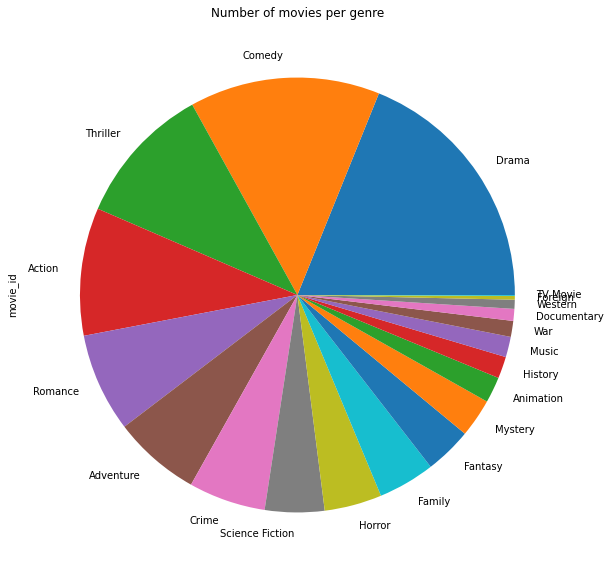

In [37]:
count_genres = movies_genres.groupby('genres').count()[['movie_id']].sort_values(by='movie_id', ascending=False)
print(count_genres)
count_genres.plot(kind ='pie',figsize=(10,10),legend = False, subplots = True)
plt.title('Number of movies per genre')
plt.show()

In [38]:
movies

,movie_id,original_title,overview,genres,cast,crew,keywords
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[ocean, drug abuse, exotic island, east india ..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[spy, based on novel, secret agent, sequel, mi..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],"[dc comics, crime fighter, terrorist, secret i..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],"[based on novel, mars, medallion, space travel..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez],"[united states–mexico barrier, legs, arms, pap..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]","[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",[Edward Burns],[]
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",[Scott Smith],"[date, love at first sight, narration, investi..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",[Daniel Hsia],[]


**Now Split the overview column and convert into list**

In [39]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
movies.iloc[0].overview

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

**Create a function to remove space between words**

In [41]:
## function to remove space

def remove_space(string):
    l=[]
    for i in string:
        l.append(i.replace(" ",""))
    return l

**Apply remove space function**

In [42]:
## apply the remove function
movies['genres']=movies['genres'].apply(remove_space)
movies['keywords']=movies['keywords'].apply(remove_space)
movies['cast']=movies['cast'].apply(remove_space)
movies['crew']=movies['crew'].apply(remove_space)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [43]:
movies.head()

,movie_id,original_title,overview,genres,cast,crew,keywords
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[cultureclash, future, spacewar, spacecolony, ..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[ocean, drugabuse, exoticisland, eastindiatrad..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[spy, basedonnovel, secretagent, sequel, mi6, ..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[dccomics, crimefighter, terrorist, secretiden..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[basedonnovel, mars, medallion, spacetravel, p..."


**Merge genres and keyword columns. movies will be recommended based on these two-column data.**

In [44]:
## Merge all columns
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']
# movies['tags']=movies['genres']+movies['keywords']
# movies.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
movies.head()

,movie_id,original_title,overview,genres,cast,crew,keywords,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili..."


**Drop other column**

In [46]:
##Drop other column
new_movies=movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [47]:
new_movies.head()

,movie_id,original_title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [48]:
##cnvrt tags column list to text
new_movies['tags']=new_movies['tags'].apply(lambda x:" ".join(x))

In [49]:
##Convert all text to lower
new_movies['tags']=new_movies['tags'].apply(lambda x:x.lower())

In [50]:
new_movies.head()

,movie_id,original_title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


# Remove same and duplicate word

In [51]:
## Remove same and duplicate word
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [52]:
new_movies['tags']=new_movies['tags'].apply(stem)

In [53]:
new_movies.head()

,movie_id,original_title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [54]:
# new_movies.to_csv('new_movies_data.csv')

In [55]:
# tfidf = TfidfVectorizer(max_features = 2000)
# X= tfidf.fit_transform(new_movies['tags'])
# print(X.toarray())

In [56]:
# tfidf.get_feature_names_out()

# Use bag of words method

In [57]:
cv = CountVectorizer(max_features = 2000)
V=cv.fit_transform(new_movies['tags']).toarray()
V

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Now use cosine similarity

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
similarity=cosine_similarity(V)
similarity

array([[1.        , 0.29293746, 0.26083602, ..., 0.28777723, 0.19524918,
        0.15860416],
       [0.29293746, 1.        , 0.34246744, ..., 0.29730058, 0.33485541,
        0.20580547],
       [0.26083602, 0.34246744, 1.        , ..., 0.33200795, 0.24573659,
        0.22771002],
       ...,
       [0.28777723, 0.29730058, 0.33200795, ..., 1.        , 0.3759506 ,
        0.23328474],
       [0.19524918, 0.33485541, 0.24573659, ..., 0.3759506 , 1.        ,
        0.31655495],
       [0.15860416, 0.20580547, 0.22771002, ..., 0.23328474, 0.31655495,
        1.        ]])

# # Now create Movie recommendation function

In [60]:

def recommend(movie):
    index = new_movies[new_movies['original_title']== movie].index[0]
    movie_name = sorted(list(enumerate(similarity[index])), reverse= True, key =lambda x:x[1])
    l=[]
    for i in movie_name[1:10]:
        a=new_movies.iloc[i[0]].original_title
        l.append(a)
    
    rec_movies=pd.DataFrame(l)
    rec_movies=rec_movies.set_axis(['Recommend Movies'], axis=1, inplace=False)
    print(rec_movies)
    

In [61]:
recommend('Iron Man')

                     Recommend Movies
0                          Iron Man 3
1                        The Avengers
2                          Iron Man 2
3  Captain America: The First Avenger
4                                Thor
5          Captain America: Civil War
6             Guardians of the Galaxy
7                               Spawn
8             Avengers: Age of Ultron


In [62]:
import pickle
pickle.dump(new_movies,open('movies_list.pkl','wb'))
pickle.dump(similarity,open('smilarity.pkl','wb'))